In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error

In [2]:
# import data
df_houses = pd.read_csv('houses.csv')
test = pd.read_csv('houses_test.csv')

In [3]:
df_houses

,Unnamed: 0,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,...,0,0,0,NaN,0,2,2008,WD,Normal,208500
1,1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,...,0,0,0,NaN,0,5,2007,WD,Normal,181500
2,2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,...,0,0,0,NaN,0,9,2008,WD,Normal,223500
3,3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,...,0,0,0,NaN,0,2,2006,WD,Abnorml,140000
4,4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,...,0,0,0,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,...,0,0,0,NaN,0,8,2007,WD,Normal,175000
1455,1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,...,0,0,4,NaN,0,2,2010,WD,Normal,210000
1456,1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,...,0,0,5,Shed,2500,5,2010,WD,Normal,266500
1457,1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,...,0,0,0,NaN,0,4,2010,WD,Normal,142125


In [4]:
df_houses.drop(columns =['Unnamed: 0','Id'], inplace=True)
test.drop(columns =['Unnamed: 0', 'Id'], inplace=True)

In [5]:
#split numeric features
df_houses_numeric = df_houses.select_dtypes([np.number])
df_test_numeric = test.select_dtypes([np.number])
df_houses_numeric = df_houses_numeric.drop(columns=['SalePrice'])
houses_num_col = df_houses_numeric.columns

In [6]:
df_houses_numeric.isna().sum()

MSSubClass       0
LotFrontage      0
LotArea          0
OverallQual      0
OverallCond      0
YearBuilt        0
YearRemodAdd     0
MasVnrArea       0
ExterQual        0
ExterCond        0
BsmtQual         0
BsmtCond         0
BsmtExposure     0
BsmtFinType1     0
BsmtFinSF1       0
BsmtFinType2     0
BsmtFinSF2       0
BsmtUnfSF        0
TotalBsmtSF      0
HeatingQC        0
1stFlrSF         0
2ndFlrSF         0
LowQualFinSF     0
GrLivArea        0
BsmtFullBath     0
BsmtHalfBath     0
FullBath         0
HalfBath         0
BedroomAbvGr     0
KitchenAbvGr     0
KitchenQual      0
TotRmsAbvGrd     0
Fireplaces       0
FireplaceQu      0
GarageYrBlt      0
GarageFinish     0
GarageCars       0
GarageArea       0
GarageQual       0
GarageCond       0
WoodDeckSF       0
OpenPorchSF      0
EnclosedPorch    0
3SsnPorch        0
ScreenPorch      0
PoolArea         0
PoolQC           0
Fence            0
MiscVal          0
MoSold           0
YrSold           0
dtype: int64

In [7]:
df_houses_numeric.shape

(1459, 51)

In [8]:
# scale numeric features
from sklearn.preprocessing import RobustScaler  
scaler = RobustScaler ()

df_houses_numeric = scaler.fit_transform(df_houses_numeric)
df_test_numeric = scaler.transform(df_test_numeric)

In [9]:
df_houses_numeric = pd.DataFrame(df_houses_numeric, columns=houses_num_col)
df_houses[houses_num_col] = df_houses_numeric

In [10]:
df_test_numeric = pd.DataFrame(df_test_numeric, columns=houses_num_col)
test[houses_num_col] = df_test_numeric

In [11]:
df_houses.columns.difference(test.columns)

Index(['SalePrice'], dtype='object')

In [12]:
# make dummies for catagorical features
df_train = pd.get_dummies(df_houses)


In [13]:
df_test = pd.get_dummies(test)


In [14]:
dif_test = df_train.columns.difference(df_test.columns).values
dif_test

array(['Condition2_RRAe', 'Condition2_RRAn', 'Condition2_RRNn',
       'Electrical_Mix', 'Exterior1st_ImStucc', 'Exterior1st_Stone',
       'Exterior2nd_Other', 'Heating_Floor', 'Heating_OthW',
       'HouseStyle_2.5Fin', 'MiscFeature_TenC', 'RoofMatl_ClyTile',
       'RoofMatl_Membran', 'RoofMatl_Metal', 'RoofMatl_Roll', 'SalePrice',
       'Utilities_NoSeWa'], dtype=object)

In [15]:
df_test[dif_test] = 0

In [16]:
df_test= df_test.drop(columns=['SalePrice'])

In [17]:
df_houses.isna().sum()

MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
Street           0
                ..
MoSold           0
YrSold           0
SaleType         0
SaleCondition    0
SalePrice        0
Length: 80, dtype: int64

In [18]:
df_houses.shape

(1459, 80)

In [19]:
# split into train and test
X = df_train.drop("SalePrice", axis = 1)
y = df_train['SalePrice']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.25, random_state=42)

In [20]:
#start with a basic regression


model1 = LinearRegression()

model1.fit(X_train, y_train)

print('cv_score', np.mean(cross_val_score(model1, X_train, y_train, cv=5)))

y_pred = model1.predict(X_test)
mean_squared_error(y_test, y_pred, squared=False)

cv_score -80225066930356.48


30684.421340948076

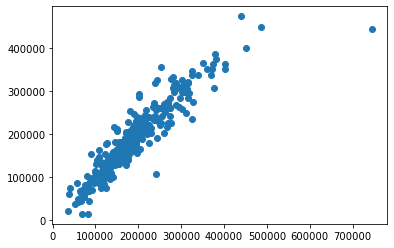

In [21]:
plt.scatter(y_test, y_pred)

In [22]:
y_dif = np.abs(y_test-y_pred )
y_dif.sort_values(ascending=False)[0:20]

1182    298886.373512
271     134132.869223
581     104474.982544
529      94250.782381
583      90351.368200
1173     87352.831965
70       81599.439916
297      79719.098818
588      74567.381920
810      73810.855909
1387     69762.043106
1000     67211.700478
479      65119.279616
218      61215.599283
1068     61004.231628
346      57407.291424
1322     56876.558952
1270     56161.182425
1163     54729.187201
1414     53702.075858
Name: SalePrice, dtype: float64

In [23]:
# need to check:
#   how the outliers afected model
#   how long model took to run

In [25]:
# try ridge and lasso regresions

from sklearn.linear_model import Ridge

model2 = Ridge()
param_grid = {'alpha': np.arange(0.001, 300)}
model2_cv = GridSearchCV(model2, param_grid, cv=5)

model2_cv.fit(X_train, y_train)
model2_cv.best_params_

{'alpha': 299.0009999999999}

In [27]:
model3 = Ridge(alpha= 299.0009999999999)
model3.fit(X_train, y_train)

print('cv_score:', np.mean(cross_val_score(model3, X_train, y_train, cv=5)))

y_pred =model3.predict(X_test)
mean_squared_error(y_test, y_pred, squared=False)

cv_score: 0.5254370133639771


33953.675293754524